<div class="alert alert-block alert-info">
<H1>MODULE 7: Data Analysis with Python</H1></div>
<div class="alert alert-block alert-success">
<H2>WEEK 6: Peer-graded Assignment</H2></div>
<div class="alert alert-block alert-warning"><H3>Analysis of House Sales in King Count US 2014 to 2015</H3> </div>
<div class="alert alert-block alert-danger"><H4>This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.</H4> </div>

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |

**<span style='color:blue'>Import Required Modules</span>**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

<div class="alert alert-block alert-info">
<H3>MODULE 7.1: Importing Data Sets</H3></div>
<span style="color:blue">Load CSV File</span>

In [2]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)
#print(df.head(5))

<div class="alert alert-block alert-success">
<H3>Question 1: Reading Data & Finding Data Types
</H3></div>
<div class="alert alert-block alert-danger">
<H4>Display the data types of each column using the function dtypes, then take a screenshot and submit it, include your code in the image.</H4></div>

In [3]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<div class="alert alert-block alert-info">
<H2>Module 7.2: Data Wrangling
</H2></div>
<div class="alert alert-block alert-success">
<H3>Question 2: Statistical Summary
</H3></div>
<div class="alert alert-block alert-danger">
<H4>Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the inplace parameter is set to True
</H4></div>

In [4]:
df.drop("id", axis = 1, inplace = True)
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**<span style='color:indigo'>We can see we have missing values for the columns  bedrooms and bathrooms</span>**

In [5]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


**<span style='color:green'>We can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace().<br> 
Don't forget to set the inplace parameter to True</span>**

In [6]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

**<span style='color:green'>We also replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms'  using the method replace(). 
<br>Don't forget to set the  inplace  parameter top  True </span>**

In [7]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


<div class="alert alert-block alert-info">
<H2>Module 7.3: Exploratory Data Analysis
</H2></div>
<div class="alert alert-block alert-success">
<H3>Question 3: Unique Value Count
</H3></div>
<div class="alert alert-block alert-danger">
<H4>Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.
</H4></div>

In [8]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<div class="alert alert-block alert-success">
<H3>Question 4: Box Plot showing Outliners
</H3></div>
<div class="alert alert-block alert-danger">
<H4>Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.
</H4></div>

<AxesSubplot:xlabel='waterfront', ylabel='price'>

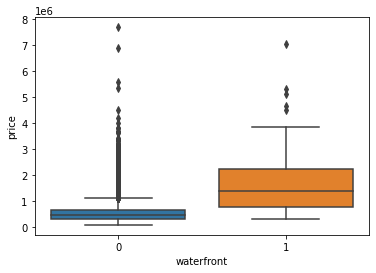

In [9]:
sns.boxplot(x="waterfront", y="price", data=df)

<div class="alert alert-block alert-success">
<H3>Question 5: Regression Plot showing Correlation
</H3></div>
<div class="alert alert-block alert-danger">
<H4>Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.
</H4></div>

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

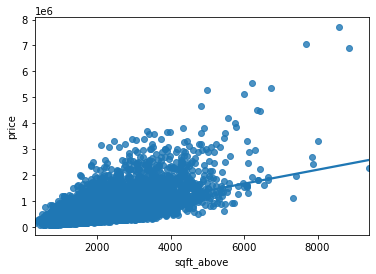

In [10]:
sns.regplot(x="sqft_above", y="price", data=df, ci = None)

**<span style='color:green'>We can use the Pandas method corr() to find the feature other than price that is most correlated with price.</span>**

In [11]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<div class="alert alert-block alert-info">
<H2>Module 7.4: Model Development
</H2></div>
<span style="color:blue">We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.</span>

In [12]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149029567

<div class="alert alert-block alert-success">
<H3>Question 6: Linear Regression Model
</H3></div>
<div class="alert alert-block alert-danger">
<H4>Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2.
</H4></div>

In [13]:
X1 = df[['sqft_living']]
Y1 = df['price']
lm = LinearRegression()
lm
lm.fit(X1,Y1)
lm.score(X1, Y1)

0.4928532179037931

<div class="alert alert-block alert-success">
<H3>Question 7: Linear Regression Model
</H3></div>
<div class="alert alert-block alert-danger">
<H4>Fit a linear regression model to predict the 'price' using the list of features
<br>Then calculate the R^2. Take a screenshot of your code.
</H4></div>

In [14]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms",
           "sqft_living15","sqft_above","grade","sqft_living"]  
X2 = df[features]
Y2 = df['price']
lm.fit(X2,Y2)
lm.score(X2,Y2)

0.6576951666037503

**<span style='color:green'>This will help with Question 8</span>**<br>
**<span style='color:indigo'>Create a list of tuples, the first element in the tuple contains the name of the estimator:</span>**<br>
**<span style='color:blue'> 
'scale'<br>
'polynomial'<br>
'model'<br>
</span>**<br>
**<span style='color:indigo'>The second element in the tuple contains the model constructor</span>**<br>
**<span style='color:blue'> 
StandardScaler()<br>
PolynomialFeatures(include_bias=False)<br>
LinearRegression()<br>
</span>**

In [15]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

<div class="alert alert-block alert-success">
<H3>Question 8: Linear Regression Model
</H3></div>
<div class="alert alert-block alert-danger">
<H4>Use the list to create a pipeline object to predict the 'price',<br>fit the object using the features in the list features, and calculate the R^2.
</H4></div>

In [20]:
pipe=Pipeline(Input)
pipe
X = df[features]
Y = df['price']
pipe.fit(X,Y)
pipe.score(X,Y)
print("r^2 value is: ",pipe.score(X,Y) )

r^2 value is:  0.7513433418681459


<div class="alert alert-block alert-info">
<H2>Module 5: Model Evaluation and Refinement
</H2></div>
<span style="color:blue">Import the necessary modules.<br>
Then, split the data into training and testing sets:
</span>

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("modules imported")

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

modules imported
number of test samples: 3242
number of training samples: 18371


<div class="alert alert-block alert-success">
<H3>Question 9: Ridge Model
</H3></div>
<div class="alert alert-block alert-danger">
<H4>
Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.
</H4></div>

In [18]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha=0.1) 
RidgeModel.fit(x_train, y_train)
RidgeModel.score(x_test, y_test)

0.6478759163939114

<div class="alert alert-block alert-success">
<H3>Question 10: Ridge Model Polynomial Transformation
</H3></div>
<div class="alert alert-block alert-danger">
<H4>
Perform a second order polynomial transform on both the training data and testing data.<br>
Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1,<br>
and calculate the R^2 utilising the test data provided. 
<br>Take a screenshot of your code and the R^2.
</H4></div>

In [19]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[features])
x_test_pr = pr.fit_transform(x_test[features])

RidgeModel1 = Ridge(alpha = 0.1) 
RidgeModel1.fit(x_train_pr, y_train)
RidgeModel1.score(x_test_pr, y_test)

0.7002744256203282